In [1]:
import numpy as np         # dealing with arrays
import os                  # dealing with directories
from random import shuffle # mixing up or currently ordered data that might lead our network astray in training.
from tqdm import tqdm
import cv2

In [2]:
TRAIN_DIR = 'train'
TEST_DIR = 'test1'
IMG_SIZE = 50
LR = 1e-3
MODEL_NAME = 'dogsvscats-{}-{}.model'.format(LR, '2conv-basic') # just so we remember which saved model is which, sizes must match

In [3]:
def label_img(img):
    word_label = img.split('.')[-3]
    # conversion to one-hot array [cat,dog]
    #                            [much cat, no dog]
    if word_label == 'cat': return [1,0]
    #                             [no cat, very doggo]
    elif word_label == 'dog': return [0,1]

In [4]:
def create_train_data():
    training_data = []
    for img in tqdm(os.listdir(TRAIN_DIR)):
        label = label_img(img)
        path = os.path.join(TRAIN_DIR,img)
        img = cv2.imread(path,cv2.IMREAD_GRAYSCALE)
        img = cv2.resize(img, (IMG_SIZE,IMG_SIZE))
        training_data.append([np.array(img),np.array(label)])
    shuffle(training_data)
    np.save('train_data.npy', training_data)
    return training_data

In [5]:
def process_test_data():
    testing_data = []
    for img in tqdm(os.listdir(TEST_DIR)):
        path = os.path.join(TEST_DIR,img)
        img_num = img.split('.')[0]
        img = cv2.imread(path,cv2.IMREAD_GRAYSCALE)
        img = cv2.resize(img, (IMG_SIZE,IMG_SIZE))
        testing_data.append([np.array(img), img_num])
        
    shuffle(testing_data)
    np.save('test_data.npy', testing_data)
    return testing_data

In [6]:
train_data = np.load('train_data.npy')

In [7]:
test_data = np.load('test_data.npy')

In [8]:
p = train_data[0][0]
p = np.array(p)
p.shape

(50, 50)

In [9]:
q = test_data[0][0]
q = np.array(q)
q.shape

(50, 50)

In [10]:
train = np.array(train_data)
train.shape

(25000, 2)

In [11]:
test = np.array(test_data)
test.shape

(12500, 2)

In [12]:
import numpy
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.constraints import maxnorm
from keras.optimizers import SGD
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils
from keras import backend as K
K.set_image_dim_ordering('th')

Using TensorFlow backend.


In [13]:
seed = 7
numpy.random.seed(seed)

In [14]:
train_x = train[:,0]
train_x

array([ array([[ 76,  48, 141, ...,  83,  82,  92],
       [139, 122,  77, ...,  86, 141,  82],
       [137, 143, 142, ...,  94,  92,  83],
       ..., 
       [ 98,  96,  91, ..., 104, 106, 105],
       [102, 100,  95, ...,  96, 110, 103],
       [ 96,  97,  95, ...,  99, 105, 100]], dtype=uint8),
       array([[ 69,  85,  75, ..., 126, 118, 121],
       [ 69,  86,  87, ..., 132, 120, 128],
       [ 67,  82,  86, ..., 115, 130, 137],
       ..., 
       [184, 172, 128, ...,  99, 112, 153],
       [103, 171, 154, ..., 109, 150, 139],
       [117,  73,  95, ..., 113, 131, 124]], dtype=uint8),
       array([[179, 131, 156, ..., 245, 242, 240],
       [161, 177, 183, ..., 245, 245, 243],
       [151,  90, 156, ..., 247, 247, 246],
       ..., 
       [ 58,  57,  64, ..., 214, 217, 217],
       [ 57,  64,  56, ..., 212, 216, 206],
       [ 52,  59,  64, ..., 209, 207, 202]], dtype=uint8),
       ...,
       array([[ 64,  43,  44, ...,  55,  53,  36],
       [111,  75,  45, ...,  48,  52,  

In [15]:
check_y = train[:,1]
check_y

array([array([0, 1]), array([0, 1]), array([0, 1]), ..., array([0, 1]),
       array([1, 0]), array([1, 0])], dtype=object)

In [16]:
train_y = []
for p in check_y:
    if p[0]==1:
        train_y.append(0)
    else: 
        train_y.append(1)
len(train_y)

25000

In [17]:
train_y  = np.array(train_y)
train_y.shape

(25000,)

In [18]:
train_x.shape

(25000,)

In [19]:
X_train = train_x[:20000]
X_test = train_x[20000:]
print X_train.shape,X_test.shape

(20000,) (5000,)


In [20]:
Y_train = train_y[:20000]
Y_test = train_y[20000:]
print Y_train.shape,Y_test.shape

(20000,) (5000,)


In [21]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [22]:
X_train

array([ array([[ 0.29803922,  0.18823529,  0.55294118, ...,  0.3254902 ,
         0.32156863,  0.36078431],
       [ 0.54509804,  0.47843137,  0.30196078, ...,  0.3372549 ,
         0.55294118,  0.32156863],
       [ 0.5372549 ,  0.56078431,  0.55686275, ...,  0.36862745,
         0.36078431,  0.3254902 ],
       ..., 
       [ 0.38431373,  0.37647059,  0.35686275, ...,  0.40784314,
         0.41568627,  0.41176471],
       [ 0.4       ,  0.39215686,  0.37254902, ...,  0.37647059,
         0.43137255,  0.40392157],
       [ 0.37647059,  0.38039216,  0.37254902, ...,  0.38823529,
         0.41176471,  0.39215686]]),
       array([[ 0.27058824,  0.33333333,  0.29411765, ...,  0.49411765,
         0.4627451 ,  0.4745098 ],
       [ 0.27058824,  0.3372549 ,  0.34117647, ...,  0.51764706,
         0.47058824,  0.50196078],
       [ 0.2627451 ,  0.32156863,  0.3372549 , ...,  0.45098039,
         0.50980392,  0.5372549 ],
       ..., 
       [ 0.72156863,  0.6745098 ,  0.50196078, ...,  0.38

In [23]:
Y_train = np_utils.to_categorical(Y_train)
Y_test = np_utils.to_categorical(Y_test)
num_classes = Y_test.shape[1]
num_classes

2

In [24]:
train_X = []
for t in X_train:
    train_X.append(t)
train_X = np.array(train_X)
train_X.shape

(20000, 50, 50)

In [25]:
train_X = train_X.reshape(-1,50,50,1)
train_X.shape

(20000, 50, 50, 1)

In [26]:
test_X = []
for t in X_test:
    test_X.append(t)
test_X = np.array(test_X)
test_X.shape

(5000, 50, 50)

In [27]:
test_X = test_X.reshape(-1,50,50,1)
test_X.shape

(5000, 50, 50, 1)

In [28]:
Y_train.shape

(20000, 2)

In [29]:
Y_test.shape

(5000, 2)

In [30]:
import tensorflow as tf
import tflearn
from tflearn.layers.conv import conv_2d, max_pool_2d
from tflearn.layers.core import input_data, dropout, fully_connected
from tflearn.layers.estimator import regression
tf.reset_default_graph()
convnet = input_data(shape=[None, IMG_SIZE, IMG_SIZE, 1], name='input')

convnet = conv_2d(convnet, 32, 5, activation='relu')
convnet = max_pool_2d(convnet, 5)

convnet = conv_2d(convnet, 64, 5, activation='relu')
convnet = max_pool_2d(convnet, 5)

convnet = conv_2d(convnet, 128, 5, activation='relu')
convnet = max_pool_2d(convnet, 5)

convnet = conv_2d(convnet, 64, 5, activation='relu')
convnet = max_pool_2d(convnet, 5)

convnet = conv_2d(convnet, 32, 5, activation='relu')
convnet = max_pool_2d(convnet, 5)

convnet = fully_connected(convnet, 1024, activation='relu')
convnet = dropout(convnet, 0.8)

convnet = fully_connected(convnet, 2, activation='softmax')
convnet = regression(convnet, optimizer='adam', learning_rate=LR, loss='categorical_crossentropy', name='targets')

model = tflearn.DNN(convnet, tensorboard_dir='log')



if os.path.exists('{}.meta'.format(MODEL_NAME)):
    model.load(MODEL_NAME)
    print('model loaded!')

train = train_data[:-500]
test = train_data[-500:]

X = np.array([i[0] for i in train]).reshape(-1,IMG_SIZE,IMG_SIZE,1)
Y = [i[1] for i in train]

test_x = np.array([i[0] for i in test]).reshape(-1,IMG_SIZE,IMG_SIZE,1)
test_y = [i[1] for i in test]

model.fit({'input': X}, {'targets': Y}, n_epoch=3, validation_set=({'input': test_x}, {'targets': test_y}), 
    snapshot_step=500, show_metric=True, run_id=MODEL_NAME)

Training Step: 1148  | total loss: 0.45854 | time: 134.430s
| Adam | epoch: 003 | loss: 0.45854 - acc: 0.8038 -- iter: 24448/24500
Training Step: 1149  | total loss: 0.46370 | time: 135.764s
| Adam | epoch: 003 | loss: 0.46370 - acc: 0.8031 | val_loss: 0.55092 - val_acc: 0.7400 -- iter: 24500/24500
--


In [31]:
model.save(MODEL_NAME)

INFO:tensorflow:/home/shivam/Desktop/machine_learning/cnn/dogs-vs-cats/dogsvscats-0.001-2conv-basic.model is not in all_model_checkpoint_paths. Manually adding it.


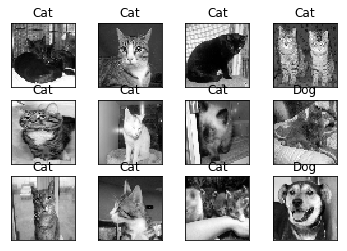

In [39]:
import matplotlib.pyplot as plt

# if you need to create the data:
#test_data = process_test_data()
# if you already have some saved:
test_data = np.load('test_data.npy')

fig=plt.figure()

for num,data in enumerate(test_data[:12]):
    # cat: [1,0]
    # dog: [0,1]
    
    img_num = data[1]
    img_data = data[0]
    y = fig.add_subplot(3,4,num+1)
    orig = img_data
    data = img_data.reshape(IMG_SIZE,IMG_SIZE,1)
    #model_out = model.predict([data])[0]
    model_out = model.predict([data])[0]
    #print model_out
    if np.argmax(model_out) == 1: str_label='Dog'
    else: str_label='Cat'
        
    y.imshow(orig,cmap='gray')
    plt.title(str_label)
    y.axes.get_xaxis().set_visible(False)
    y.axes.get_yaxis().set_visible(False)
plt.show()

In [40]:
with open('submission_file.csv','w') as f:
    f.write('id,label\n')
            
with open('submission_file.csv','a') as f:
    for data in tqdm(test_data):
        img_num = data[1]
        img_data = data[0]
        orig = img_data
        data = img_data.reshape(IMG_SIZE,IMG_SIZE,1)
        model_out = model.predict([data])[0]
        f.write('{},{}\n'.format(img_num,model_out[1]))

100%|██████████| 12500/12500 [00:55<00:00, 223.28it/s]
